In [96]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### 1. PROBLEM STATEMENT

In [ ]:
In this notebook I’m going to do a logistic regression analysis of a dataset to classify a tumour as malignant or benign.

To check the effectiveness of the model by calculating the accuracy, sensitivity, precision and F1 score.

Before we start with the analysis it is important to understand what exactly we are trying to predict and 
what the information provided, our variables of the dataset, mean. “Benign” refers to a type of medical condition 
or growth that is not cancerous or dangerous as opposed to “malignant”. The dataset contains 9 independent variables, 
each of them is a feature that is typically used in breast cancer analysis.

Clump thickness
is a measure of how thick the cells are within a tumor. Benign cells tend to be grouped in mono-layers, 
while cancerous - in multi-layer.(Sarkar et al. 2017, p. 1)

Uniformity
of cell size and uniformity of cell shape are two characteristics that can be used to describe the appearance of cells 
under a microscope. Here we are checking the degree to which the cells in a sample are similar in size and shape.

Marginal adhesion
is the degree to which cells in a tissue sample adhere, or stick, to one another at the edges of the sample. 
Loss of adhesion might be a sign of malignancy.

Single
epithelial cell size is the size of individual cells in an epithelial tissue sample. Epithelial tissue is a type 
of tissue that covers the surface of the body and lines internal organs and structures. It is made up of cells 
that are tightly packed together and held in place by specialized junctions.

Bare nuclei
refers to cells in a tissue sample that are missing their cell membranes and cytoplasm, leaving only the nucleus visible.

Bland
chromatin is the appearance of the genetic material (chromatin) in the nucleus of a cell under a microscope. 
Chromatin is made up of DNA and proteins, and it contains the genetic information that controls the cell’s functions. 
When the chromatin in a cell’s nucleus is compact and uniform in appearance, it is said to be “bland.”

Normal
nucleoli are small, spherical structures found within the nucleus of a cell. They are composed of DNA, RNA, 
and proteins and are responsible for synthesizing ribosomes, which are the cellular structures that produce proteins. 
Nucleoli are usually visible under a microscope and can vary in size and appearance depending on the stage 
of the cell cycle and the cell’s function. In normal, healthy cells, nucleoli are usually small and have a distinct, 
well-defined border.

Mitosis
is the process of cell division that occurs in all living organisms. During mitosis, a single cell divides into 
two daughter cells, each of which contains a copy of the parent cell’s DNA. The process of mitosis is essential 
for the growth and repair of tissues and the production of new cells.




### 2. DATA GATHERING

In [6]:
Breast_df = pd.read_csv('DATA/breast_cancer.csv')
Breast_df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [7]:
Breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [9]:
Breast_df.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [14]:
Breast_df['Clump Thickness'].value_counts()

1     139
5     128
3     104
4      79
10     69
2      50
8      44
6      33
7      23
9      14
Name: Clump Thickness, dtype: int64

In [15]:
Breast_df['Uniformity of Cell Size'].value_counts()

1     373
10     67
3      52
2      45
4      38
5      30
8      28
6      25
7      19
9       6
Name: Uniformity of Cell Size, dtype: int64

In [18]:
Breast_df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [30]:
Breast_df['Marginal Adhesion'].value_counts()

1     393
3      58
2      58
10     55
4      33
8      25
5      23
6      21
7      13
9       4
Name: Marginal Adhesion, dtype: int64

In [19]:
Breast_df['Class'].replace({2:0, 4:1}, inplace=True)

In [21]:
Breast_df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [49]:
Breast_df.columns = list(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'])

In [50]:
Breast_df

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1.0,2,1,3,1,1,0
1,5,4,4,1.0,7,10,3,2,1,0
2,3,1,1,1.0,2,2,3,1,1,0
3,6,8,8,1.0,3,4,3,7,1,0
4,4,1,1,1.0,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1.0,3,2,1,1,1,0
679,2,1,1,1.0,2,1,1,1,1,0
680,5,10,10,1.0,7,3,8,10,2,1
681,4,8,6,1.0,3,4,10,6,1,1


### 3. EDA

#### 3.1 Clump Thickness	

<AxesSubplot:>

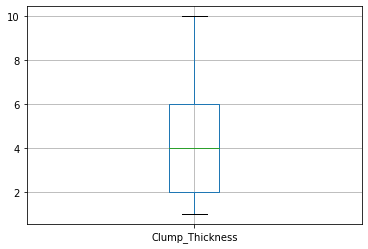

In [52]:
Breast_df[['Clump_Thickness']].boxplot()

<AxesSubplot:xlabel='Clump_Thickness'>

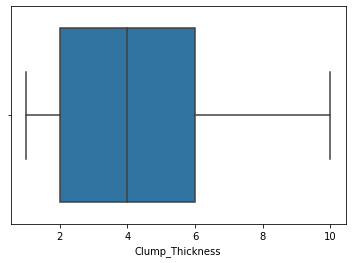

In [53]:
sns.boxplot(Breast_df['Clump_Thickness'])

<AxesSubplot:xlabel='Clump_Thickness', ylabel='Density'>

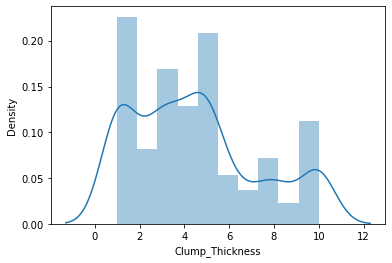

In [79]:
sns.distplot(Breast_df['Clump_Thickness'])

<AxesSubplot:xlabel='Uniformity_of_Cell_Size'>

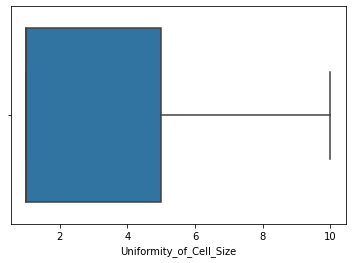

In [54]:
sns.boxplot(Breast_df['Uniformity_of_Cell_Size'])

<AxesSubplot:xlabel='Uniformity_of_Cell_Size', ylabel='Density'>

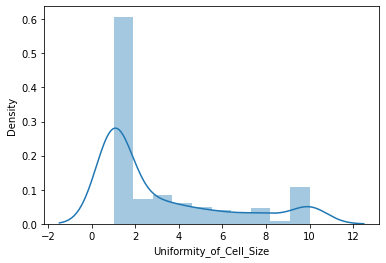

In [80]:
sns.distplot(Breast_df['Uniformity_of_Cell_Size'])

<AxesSubplot:xlabel='Uniformity_of_Cell_Shape'>

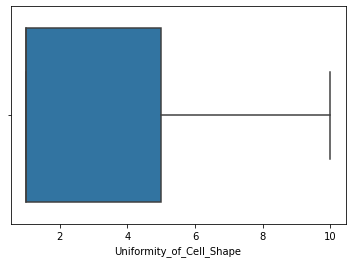

In [55]:
sns.boxplot(Breast_df['Uniformity_of_Cell_Shape'])

<AxesSubplot:xlabel='Uniformity_of_Cell_Shape', ylabel='Density'>

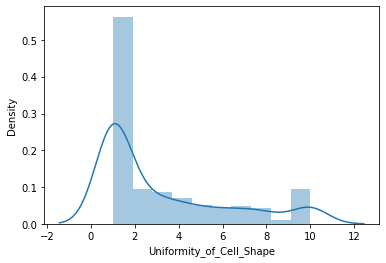

In [81]:
sns.distplot(Breast_df['Uniformity_of_Cell_Shape'])

<AxesSubplot:xlabel='Marginal_Adhesion'>

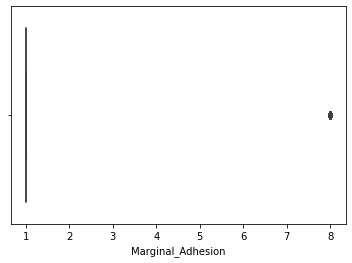

In [56]:
sns.boxplot(Breast_df['Marginal_Adhesion'])

In [57]:
Breast_df[Breast_df['Marginal_Adhesion'].between(8,15)].shape

(25, 10)

In [58]:
Breast_df['Marginal_Adhesion'].value_counts()

1.0    658
8.0     25
Name: Marginal_Adhesion, dtype: int64

<AxesSubplot:xlabel='Marginal_Adhesion', ylabel='Density'>

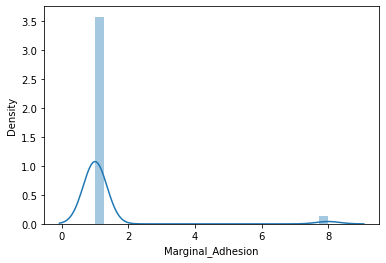

In [82]:
sns.distplot(Breast_df['Marginal_Adhesion'])

<AxesSubplot:xlabel='Single_Epithelial_Cell_Size'>

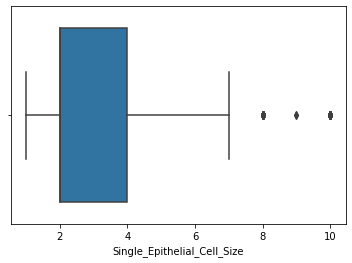

In [59]:
sns.boxplot(Breast_df['Single_Epithelial_Cell_Size'])

In [60]:
Breast_df[Breast_df['Single_Epithelial_Cell_Size'].between(8,15)].shape

(54, 10)

In [61]:
Breast_df['Single_Epithelial_Cell_Size'] = np.where(Breast_df['Single_Epithelial_Cell_Size'].between(8,15), Breast_df['Single_Epithelial_Cell_Size'].median(),
                                   Breast_df['Single_Epithelial_Cell_Size'])

<AxesSubplot:xlabel='Single_Epithelial_Cell_Size', ylabel='Density'>

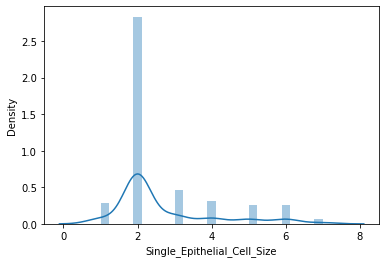

In [83]:
sns.distplot(Breast_df['Single_Epithelial_Cell_Size'])

<AxesSubplot:xlabel='Bare_Nuclei'>

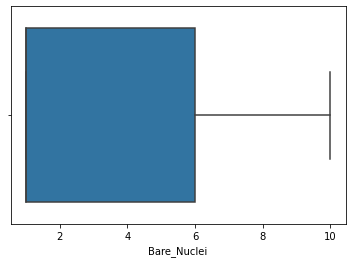

In [63]:
sns.boxplot(Breast_df['Bare_Nuclei'])

<AxesSubplot:xlabel='Bare_Nuclei', ylabel='Density'>

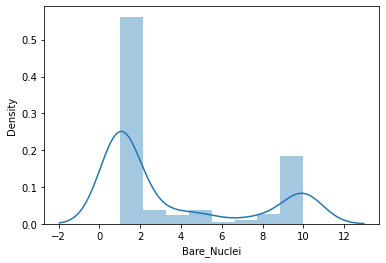

In [84]:
sns.distplot(Breast_df['Bare_Nuclei'])

<AxesSubplot:xlabel='Bland_Chromatin'>

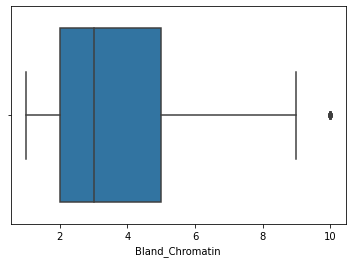

In [64]:
sns.boxplot(Breast_df['Bland_Chromatin'])

In [67]:
Breast_df[Breast_df['Bland_Chromatin'].between(9,15)].shape

(0, 10)

In [66]:
Breast_df['Bland_Chromatin'] = np.where(Breast_df['Bland_Chromatin'].between(9,15), Breast_df['Bland_Chromatin'].median(),
                                   Breast_df['Bland_Chromatin'])

<AxesSubplot:xlabel='Bland_Chromatin', ylabel='Density'>

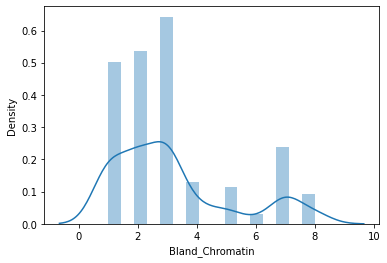

In [85]:
sns.distplot(Breast_df['Bland_Chromatin'])

<AxesSubplot:xlabel='Normal_Nucleoli'>

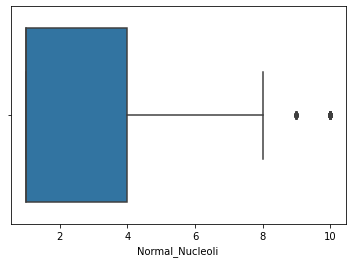

In [68]:
sns.boxplot(Breast_df['Normal_Nucleoli'])

In [71]:
Breast_df[Breast_df['Normal_Nucleoli'].between(8,10)].shape

(0, 10)

In [70]:
Breast_df['Normal_Nucleoli'] = np.where(Breast_df['Normal_Nucleoli'].between(8,10), Breast_df['Normal_Nucleoli'].median(),
                                   Breast_df['Normal_Nucleoli'])

<AxesSubplot:xlabel='Normal_Nucleoli', ylabel='Density'>

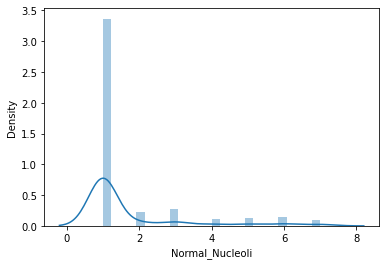

In [86]:
sns.distplot(Breast_df['Normal_Nucleoli'])

<AxesSubplot:xlabel='Mitoses'>

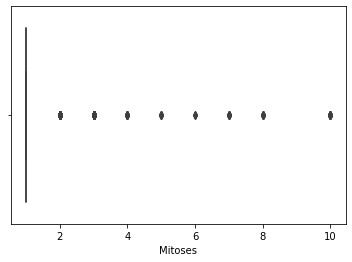

In [72]:
sns.boxplot(Breast_df['Mitoses'])

<AxesSubplot:xlabel='Mitoses', ylabel='Density'>

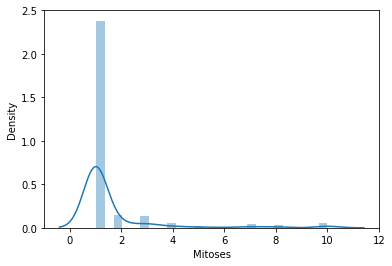

In [74]:
sns.distplot(Breast_df['Mitoses'])

In [77]:
Breast_df[Breast_df['Mitoses'].between(2,10)].shape

(0, 10)

In [76]:
Breast_df['Mitoses'] = np.where(Breast_df['Mitoses'].between(2,10), Breast_df['Mitoses'].median(),
                                   Breast_df['Mitoses'])

In [ ]:
Breast_df[Breast_df['Class'].between(2,10)].shape

<AxesSubplot:xlabel='Class'>

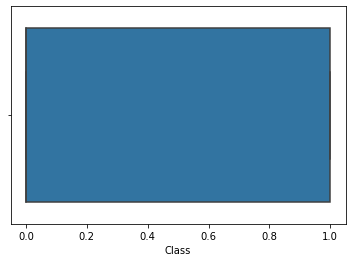

In [78]:
sns.boxplot(Breast_df['Class'])

<AxesSubplot:xlabel='Class', ylabel='Density'>

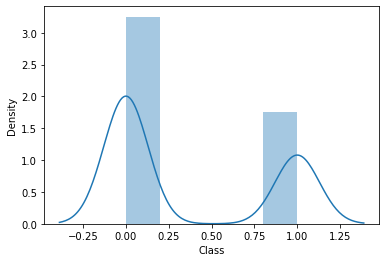

In [87]:
sns.distplot(Breast_df['Class'])

In [88]:
Breast_df.corr().tail(1)

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Class,0.71479,0.820801,0.821891,0.265674,0.602866,0.822696,0.708874,0.418439,NaN,1.0


<AxesSubplot:>

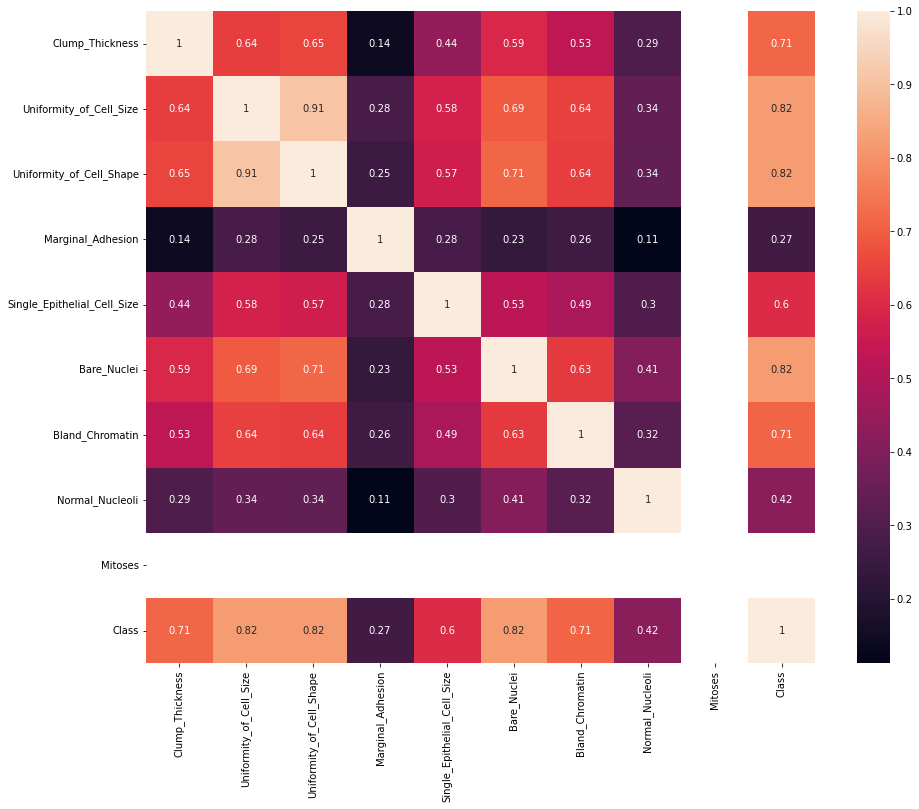

In [89]:
plt.figure(figsize=(15,12))
sns.heatmap(Breast_df.corr(),annot=True)

In [90]:
Breast_df['Mitoses']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
678    1.0
679    1.0
680    1.0
681    1.0
682    1.0
Name: Mitoses, Length: 683, dtype: float64

In [91]:
Breast_df['Mitoses'].value_counts()

1.0    683
Name: Mitoses, dtype: int64

In [92]:
x = Breast_df.drop('Class', axis=1)
x

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1.0,2.0,1,3.0,1.0,1.0
1,5,4,4,1.0,7.0,10,3.0,2.0,1.0
2,3,1,1,1.0,2.0,2,3.0,1.0,1.0
3,6,8,8,1.0,3.0,4,3.0,7.0,1.0
4,4,1,1,1.0,2.0,1,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1.0,3.0,2,1.0,1.0,1.0
679,2,1,1,1.0,2.0,1,1.0,1.0,1.0
680,5,10,10,1.0,7.0,3,8.0,1.0,1.0
681,4,8,6,1.0,3.0,4,3.0,6.0,1.0


In [94]:
x.shape

(683, 9)

<AxesSubplot:>

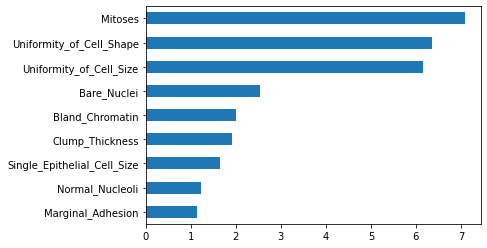

In [97]:
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(round(vif,2))
    
s1 = pd.Series(vif_list, index=x.columns)
s1.sort_values().plot(kind= 'barh')

In [98]:
Breast_df['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [99]:
y = Breast_df['Class']

In [100]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2,stratify=y)

In [102]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [104]:
def evaluate_model(model, ind_var, act):
    pred = model.predict(ind_var)
    
    acc_score = accuracy_score(act,pred)
    print('Accuracy Score:', acc_score)
    print('**'*20)
    
    cnf_matrix = confusion_matrix(act, pred)
    print('Confision Matrix: \n', cnf_matrix)
    print('**'*20)
    
    clf_report = classification_report(act, pred)
    print('Classification Report :\n', clf_report)
    
    return pred
    
print('Testing Data Evaluation'.center(60, '*'))   
y_pred = evaluate_model(log_reg, x_test, y_test)
print('Training Data Evaluation'.center(60, '*'))   
y_pred = evaluate_model(log_reg, x_train, y_train)

******************Testing Data Evaluation*******************
Accuracy Score: 0.9707317073170731
****************************************
Confision Matrix: 
 [[130   3]
 [  3  69]]
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       0.96      0.96      0.96        72

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

******************Training Data Evaluation******************
Accuracy Score: 0.9665271966527197
****************************************
Confision Matrix: 
 [[304   7]
 [  9 158]]
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       311
           1       0.96      0.95      0.95       167

    accuracy     

<Figure size 432x288 with 0 Axes>

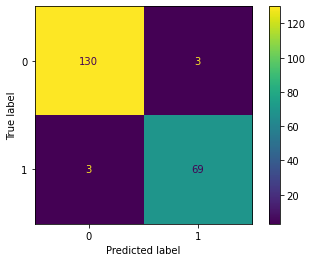

In [105]:
plt.figure(figsize=(6,4))
plot_confusion_matrix(log_reg, x_test, y_test)

In [106]:
y_pred_proba = log_reg.predict_proba(x_test)
y_pred_proba

array([[9.91185099e-01, 8.81490079e-03],
       [9.28035493e-01, 7.19645068e-02],
       [4.89196739e-01, 5.10803261e-01],
       [9.98818509e-01, 1.18149133e-03],
       [9.90461310e-01, 9.53868953e-03],
       [4.45142224e-04, 9.99554858e-01],
       [9.96747578e-01, 3.25242152e-03],
       [2.27078539e-02, 9.77292146e-01],
       [9.11782298e-03, 9.90882177e-01],
       [9.96824829e-01, 3.17517142e-03],
       [9.90894517e-01, 9.10548312e-03],
       [9.70648441e-01, 2.93515594e-02],
       [9.98062668e-01, 1.93733157e-03],
       [4.47124297e-01, 5.52875703e-01],
       [9.80154622e-01, 1.98453775e-02],
       [9.82784048e-01, 1.72159522e-02],
       [1.47175022e-04, 9.99852825e-01],
       [6.53637450e-03, 9.93463625e-01],
       [1.22404084e-03, 9.98775959e-01],
       [2.73993333e-03, 9.97260067e-01],
       [5.06782864e-02, 9.49321714e-01],
       [9.61998113e-01, 3.80018875e-02],
       [9.94609697e-01, 5.39030285e-03],
       [9.65145559e-01, 3.48544412e-02],
       [1.328018

In [107]:
y_pred_proba[:,1]

array([0.0088149 , 0.07196451, 0.51080326, 0.00118149, 0.00953869,
       0.99955486, 0.00325242, 0.97729215, 0.99088218, 0.00317517,
       0.00910548, 0.02935156, 0.00193733, 0.5528757 , 0.01984538,
       0.01721595, 0.99985282, 0.99346363, 0.99877596, 0.99726007,
       0.94932171, 0.03800189, 0.0053903 , 0.03485444, 0.98671981,
       0.00532604, 0.01428698, 0.99441113, 0.00118149, 0.99989937,
       0.17915338, 0.00532604, 0.00727556, 0.01940115, 0.30856834,
       0.00892088, 0.99962264, 0.0118836 , 0.00317517, 0.01438377,
       0.97773001, 0.05676914, 0.00118149, 0.00196079, 0.01762389,
       0.03688648, 0.00325242, 0.00193733, 0.01407057, 0.02311396,
       0.01455572, 0.99727548, 0.98186218, 0.00759299, 0.00576503,
       0.00526254, 0.00235337, 0.00532604, 0.45350491, 0.00532604,
       0.99642853, 0.61176006, 0.85387545, 0.00118149, 0.99999358,
       0.00118149, 0.00325242, 0.01641233, 0.9668735 , 0.02366479,
       0.999922  , 0.95429867, 0.00193733, 0.0088149 , 0.00892

In [108]:
plt.figure(figsize=(6,4))
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True)

ValueError: Found input variables with inconsistent numbers of samples: [205, 478]

<Figure size 432x288 with 0 Axes>

In [109]:
y_pred_proba = log_clf.predict_proba(x_test)
y_pred_proba

NameError: name 'log_clf' is not defined

In [110]:
fpr, tpr , thresh = roc_curve(y_test,y_pred_proba[:,1] )

thresh

array([1.99999358e+00, 9.99993584e-01, 9.77292146e-01, 9.72286827e-01,
       8.96615644e-01, 8.53875447e-01, 5.84294589e-01, 5.52875703e-01,
       4.53504906e-01, 1.79153382e-01, 8.24338902e-02, 3.80018875e-02,
       3.68864831e-02, 2.37718217e-02, 2.36647894e-02, 1.47296882e-02,
       1.45557162e-02, 1.45066699e-02, 1.43837689e-02, 1.43352936e-02,
       9.10548312e-03, 8.81490079e-03, 8.71017060e-03, 5.76502763e-03,
       5.39030285e-03, 5.32604182e-03, 5.26254282e-03, 3.26113075e-03,
       3.25242152e-03, 3.21356511e-03, 3.17517142e-03, 3.16434937e-03,
       2.96828382e-03, 2.00753645e-03, 1.96078692e-03, 1.93733157e-03,
       1.66764554e-03, 1.27931218e-03, 1.18149133e-03])

Text(0, 0.5, 'True Positive Rate')

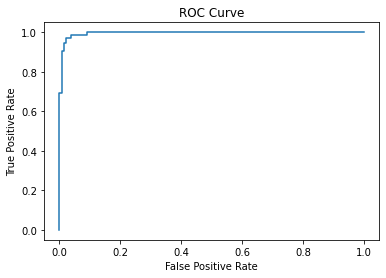

In [111]:
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [112]:
x.sample(1).T

,230
Clump_Thickness,9.0
Uniformity_of_Cell_Size,8.0
Uniformity_of_Cell_Shape,8.0
Marginal_Adhesion,1.0
Single_Epithelial_Cell_Size,6.0
Bare_Nuclei,2.0
Bland_Chromatin,4.0
Normal_Nucleoli,1.0
Mitoses,1.0


In [115]:
Clump_Thickness = 9.0
Uniformity_of_Cell_Size = 9.0
Uniformity_of_Cell_Shape = 7.0
Marginal_Adhesion = 2.0
Single_Epithelial_Cell_Size = 7.0
Bare_Nuclei= 2.0
Bland_Chromatin = 5.0
Normal_Nucleoli = 2.0
Mitoses = 1.0

In [116]:
test_array=np.array([Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,
                     Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses],ndmin=2)

In [117]:
log_reg.predict(test_array)[0]

1

In [118]:
project_data = {'columns': list(x.columns)}
project_data

{'columns': ['Clump_Thickness',
  'Uniformity_of_Cell_Size',
  'Uniformity_of_Cell_Shape',
  'Marginal_Adhesion',
  'Single_Epithelial_Cell_Size',
  'Bare_Nuclei',
  'Bland_Chromatin',
  'Normal_Nucleoli',
  'Mitoses']}

In [119]:
test_array = np.zeros(x.shape[1])
test_array[0] = Clump_Thickness
test_array[1] = Uniformity_of_Cell_Size
test_array[2] = Uniformity_of_Cell_Shape
test_array[3] = Marginal_Adhesion
test_array[4] = Single_Epithelial_Cell_Size
test_array[5] = Bare_Nuclei
test_array[6] = Bland_Chromatin
test_array[7] = Normal_Nucleoli
test_array[8] = Mitoses


test_array

array([9., 9., 7., 2., 7., 2., 5., 2., 1.])

In [120]:
result = log_reg.predict([test_array])
print(f'risk of Breast Cancer is : .', result)

risk of Breast Cancer is : . [1]


In [125]:
import pickle
import json

In [122]:
with open('Log_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

In [126]:
with open('project_data.json', 'w') as f:
    json.dump(project_data, f)